# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

Simulated Probabilities:
Chance of Winning Keeping Selected Door:  0.3325
Chance of Winning Switching Selected Door:  0.6675


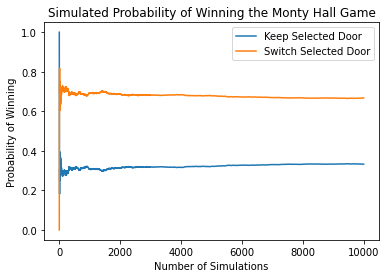

In [1]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

stay = []
switch = []
for i in range(10**4):
    car_door = np.random.randint(1,4)
    contestant_selection = np.random.randint(1,4)
    remaining_goats = [door for door in [1,2,3] 
                       if door!= car_door and door != contestant_selection]
    door_revealed = np.random.choice(remaining_goats)
    if_switch = [door for door in [1,2,3] 
                 if door != contestant_selection and door != door_revealed][0]
    # Record results if contestant changes door selection
    if if_switch == car_door:
        switch.append(1)
    else:
        switch.append(0)
    # Record results if contestant keep door selection
    if contestant_selection == car_door:
        stay.append(1)
    else:
        stay.append(0)
# Plot the results
plt.plot(range(1,10**4+1), [np.mean(stay[:i]) 
                            for i in range(1,10**4+1)], label='Keep Selected Door')
plt.plot(range(1,10**4+1), [np.mean(switch[:i]) 
                            for i in range(1,10**4+1)], label='Switch Selected Door')
plt.ylabel('Probability of Winning')
plt.xlabel('Number of Simulations')
plt.title('Simulated Probability of Winning the Monty Hall Game')
plt.legend()
print('Simulated Probabilities:')
print('Chance of Winning Keeping Selected Door: ', np.mean(stay))
print('Chance of Winning Switching Selected Door: ', np.mean(switch))

In [2]:
# video-solution

import numpy as np

In [3]:
switch = True
winner = 0
car = np.random.choice([1,2,3])
player_selection = np.random.choice([1,2,3])
doors = [1, 2, 3]
if car == player_selection:
    doors.remove(car)
    door_to_reveal = np.random.choice(doors)
else:
    doors.remove(car)
    doors.remove(player_selection)
    door_to_reveal = np.random.choice(doors)
    
if switch:
    new_choice = [1,2,3]
    new_choice.remove(player_selection)
    new_choice.remove(door_to_reveal)
    if new_choice[0] == car:
        winner += 1
else:
     if player_selection == car:
        winner += 1

car, player_selection, door_to_reveal, new_choice, winner

(2, 3, 1, [2], 1)

In [4]:
switch = True
winner_switch = []
for i in range(2000):
    car = np.random.choice([1,2,3])
    player_selection = np.random.choice([1,2,3])
    
    doors = [1, 2, 3]
    if car == player_selection:
        doors.remove(car)
        door_to_reveal = np.random.choice(doors)
    else:
        doors.remove(car)
        doors.remove(player_selection)
        door_to_reveal = np.random.choice(doors)

    if switch:
        new_choice = [1,2,3]
        new_choice.remove(player_selection)
        new_choice.remove(door_to_reveal)
        if new_choice[0] == car:
            winner_switch.append(1)
        else:
                winner_switch.append(0)
    else:
        if player_selection == car:
            winner_no_switch.append(1)
        else:
            winner_no_switch.append(0)

In [5]:
switch = False
winner_no_switch = []
for i in range(2000):
    car = np.random.choice([1,2,3])
    player_selection = np.random.choice([1,2,3])
    
    doors = [1, 2, 3]
    if car == player_selection:
        doors.remove(car)
        door_to_reveal = np.random.choice(doors)
    else:
        doors.remove(car)
        doors.remove(player_selection)
        door_to_reveal = np.random.choice(doors)

    if switch:
        new_choice = [1,2,3]
        new_choice.remove(player_selection)
        new_choice.remove(door_to_reveal)
        if new_choice[0] == car:
            winner_switch.append(1)
        else:
                winner_switch.append(0)
    else:
        if player_selection == car:
            winner_no_switch.append(1)
        else:
            winner_no_switch.append(0)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/carrie/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/carrie/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


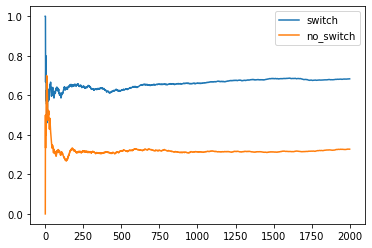

In [7]:
plt.plot(range(2000), [np.mean(winner_switch[:x]) for x in range(len(winner_switch))], 
         label = "switch")
plt.plot(range(2000), [np.mean(winner_no_switch[:x]) for x in range(len(winner_no_switch))], 
         label = "no_switch")
plt.legend()

## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 